<a href="https://colab.research.google.com/github/Oluwadara17/Data-Science/blob/main/obesity2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1.1 Introduction**

The dataset utilised in this analysis was obtained from the UCL Repository, titled "Estimation of Obesity Levels Based On Eating Habits and Physical Condition," available for research purposes at the following link: https://doi.org/10.24432/C5H31Z. It was obtained from the site on 14/11/2024.

Obesity, characterised by an abnormal or excessive accumulation of fat and a body mass index (BMI) over 30, constitutes a significant global health issue. Excessively elevated BMI levels are projected to have resulted in around 5 million fatalities from noncommunicable diseases (NCDs) in 2019. Moreover, obesity rates in both adults and children have steadily increased. From 1990 to 2022, the global prevalence of obesity among children and adolescents aged 5 to 19 increased thrice, rising from 2% to 8%, while the obesity rate among adults aged 18 and older more than doubled, escalating from 7% to 16% (World Health Organisation, 2024).

# Data Overview
The dataset used in this study comes from the healthcare industry and is appropriately labeled "Estimation of Obesity Levels Based on Eating Habits and Physical Condition." It contains data that allows the assessment of obesity levels in people from Mexico, Peru, and Colombia based on their eating habits and physical condition. With 17 variables and 2111 records, the dataset contains 8 quantitative features and 11 categorical features, each of which provides unique insights into the intricate interaction of factors that influence obesity.

# Objectives:
The primary aim of this study is to develop a model for predicting and identifying individuals at risk of obesity, facilitating early intervention and disease prevention.




## **1.2 Related Work**

The chosen peer-reviewed article for this review is Thamrin, S.A. et al., 2021. Predicting Adult Obesity Using Machine Learning Techniques: A Study of the Indonesian Basic Health Research 2018. The author utilised data from RISKESDAS, a comprehensive cross-sectional survey conducted every five years by the Indonesian Ministry of Health. This community-based health survey encompasses all 34 provinces and 514 districts/cities in Indonesia, including an extensive array of health indicators, from public health status to chronic disease risk factors. The dataset is pertinent to my research as it aims to predict obesity risk in adults and offers insights for policymakers to formulate or enhance policies for addressing obesity-related health concerns.


The study sought to identify main risk factors for adult obesity and assess the efficacy of machine learning algorithms in its prediction. The authors utilised data cleansing, feature selection, and techniques to fix class imbalance, so providing a robust modelling procedure. Three algorithms was used in this study: logistic regression, CART, and naïve Bayes—were evaluated to identify the most effective classifier. Logistic regression was identified as the highest-performing model, achieving an average AUC of 0.798, indicating exceptional predictive capability.



This study is highly commendable for its thorough handling of data imbalances, a prevalent challenge in health datasets. The approach and findings provide significant insights into the application of machine learning in public health, highlighting the necessity of precise obesity prediction to guide policy and interventions. Its significance to my work is rooted in its common objective of assisting health authorities in identifying at-risk persons and formulating evidence-based solutions to alleviate the effects of obesity. The work illustrates the capacity of machine learning to facilitate significant advancements in chronic disease management.


# **Data Exploration**

# Import Libracies

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [ ]:
# load of the obesity dataset
dataset = pd.read_csv('/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:
# print the first five(5) rows of the dataset
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# print in that last five(5) rows of the dataset
dataset.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


To gain more insight about the datset, the following information were gathered.
1.   Number of features
2.   Number of sample
3.   Number and labels (categories) of categorical variables
4.   Number of numeric features
5.   Range, Mean, Q1, Q2, Q3, Standard Deviation for all the numeric variables
in the dataset (to be calculated and reported separately for each numeric
variable)






# Number of features

In [ ]:
# Number of features
num_features = len(dataset.columns)
print("Number of features:", num_features)

Number of features: 17


#  Number of sample

In [ ]:
# Number of samples
num_samples = len(dataset)
print("Number of samples:", num_samples)

Number of samples: 2111


# Number and labels (categories) of categorical variables

In [ ]:
# Number and labels of categorical variables
cat_vars = dataset.select_dtypes(include='object').columns
num_cat_vars = len(cat_vars)
print("Number of categorical variables:", num_cat_vars)
print("Categorical variable labels: ")
# iteration on each categorical variables
for var in cat_vars:
  print(f'unique values of {var}:\n {dataset[var].value_counts()}')
  print("")

Number of categorical variables: 9
Categorical variable labels: 
unique values of Gender:
 Gender
Male      1068
Female    1043
Name: count, dtype: int64

unique values of family_history_with_overweight:
 family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

unique values of FAVC:
 FAVC
yes    1866
no      245
Name: count, dtype: int64

unique values of CAEC:
 CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

unique values of SMOKE:
 SMOKE
no     2067
yes      44
Name: count, dtype: int64

unique values of SCC:
 SCC
no     2015
yes      96
Name: count, dtype: int64

unique values of CALC:
 CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

unique values of MTRANS:
 MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64


#Number of numeric features

In [ ]:
# Number of numeric features
num_vars = dataset.select_dtypes(include=['int64', 'float64']).columns
num_num_vars = len(num_vars)
print("Number of numeric variables:", num_num_vars)

Number of numeric variables: 8


# Range, Mean, Q1, Q2, Q3, Standard Deviation for all the numeric variables in the dataset (to be calculated and reported separately for each numeric variable)

In [ ]:
# iterate the numerical features
for col in num_vars:
  range =  dataset[col].max() - dataset[col].min()
  # Mean
  Mean = dataset[col].mean()

  # Quartiles
  Q1 = dataset[col].quantile(0.25)
  Q2 = dataset[col].quantile(0.50)
  Q3 = dataset[col].quantile(0.75)

  # Standard Deviation
  Standard_Deviation = dataset[col].std()
  print(f'Numberic Statistics For {col} Feature')
  print('Range:', range)
  print('Q1:', Q1 )
  print('Q2:', Q2  )
  print('Q3:', Q3 )
  print('Standard_Deviation:', Standard_Deviation)
  print(" ")

Numberic Statistics For Age Feature
Range: 47.0
Q1: 19.947192
Q2: 22.77789
Q3: 26.0
Standard_Deviation: 6.3459682737322405
 
Numberic Statistics For Height Feature
Range: 0.53
Q1: 1.63
Q2: 1.700499
Q3: 1.768464
Standard_Deviation: 0.09330481986792
 
Numberic Statistics For Weight Feature
Range: 134.0
Q1: 65.473343
Q2: 83.0
Q3: 107.430682
Standard_Deviation: 26.191171745204688
 
Numberic Statistics For FCVC Feature
Range: 2.0
Q1: 2.0
Q2: 2.385502
Q3: 3.0
Standard_Deviation: 0.5339265785033023
 
Numberic Statistics For NCP Feature
Range: 3.0
Q1: 2.658738
Q2: 3.0
Q3: 3.0
Standard_Deviation: 0.7780386488418594
 
Numberic Statistics For CH2O Feature
Range: 2.0
Q1: 1.5848125
Q2: 2.0
Q3: 2.47742
Standard_Deviation: 0.6129534517968702
 
Numberic Statistics For FAF Feature
Range: 3.0
Q1: 0.124505
Q2: 1.0
Q3: 1.6666775
Standard_Deviation: 0.8505924308367011
 
Numberic Statistics For TUE Feature
Range: 2.0
Q1: 0.0
Q2: 0.62535
Q3: 1.0
Standard_Deviation: 0.6089272596763761
 


Through the pursuit to gain more insight about the dataset. I discovered that the dataset comprises of 17 feature and 2111 records/sample. After going indepth I discover there are 8 numeric feature and 9 categorical dataset. the Numeric Statistics was performed to understand the Range, Mean, Q1, Q2, Q3, Standard Deviation of each numeric feature and as can be seen above.

# Data Visualisation

# Numeric Feature

To show the distrubtion of each feature of the Numberic type.

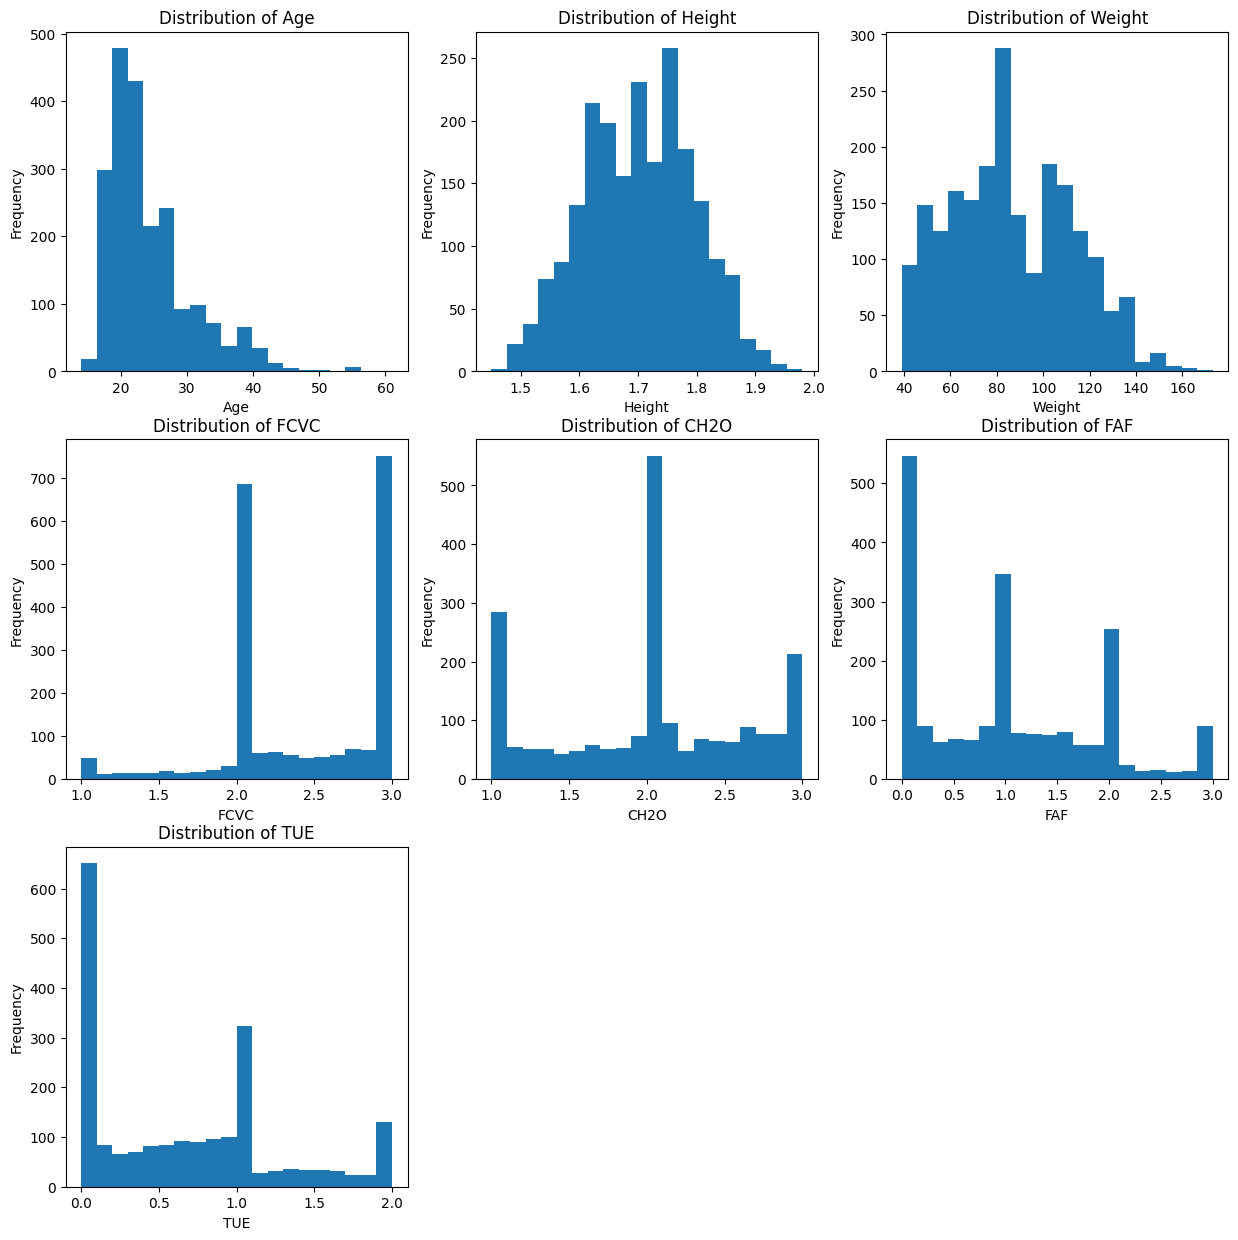

In [ ]:
num_features = ['Age','Height', 'Weight', 'FCVC','CH2O','FAF','TUE']
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

# Iterate through the features and plot histograms
for i, col in enumerate(num_features):
    axes[i].hist(dataset[col], bins=20)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove the last subplot because of we have just 7 feature which are numeric
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

# Categorical Features

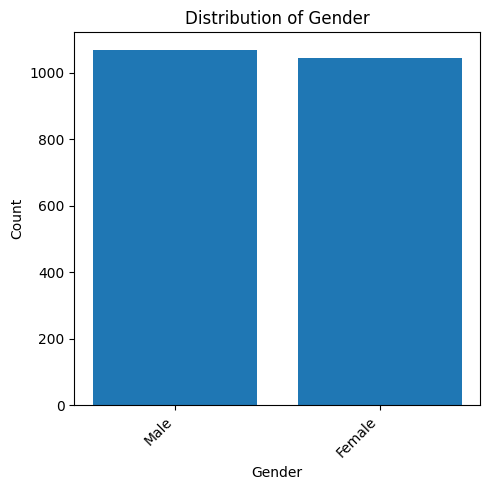

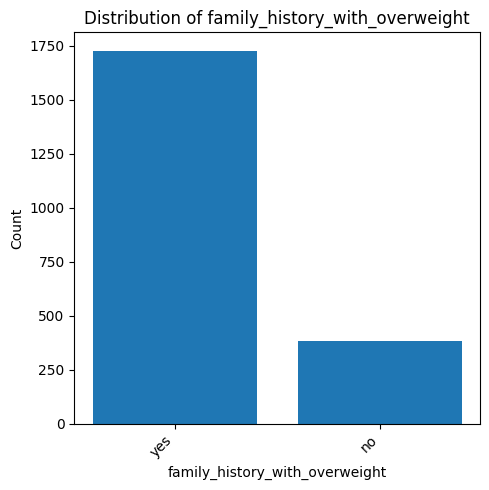

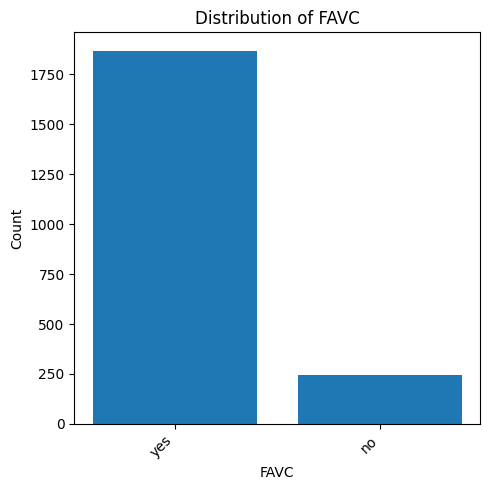

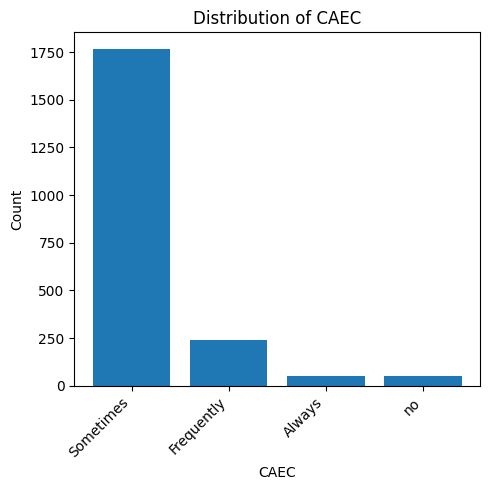

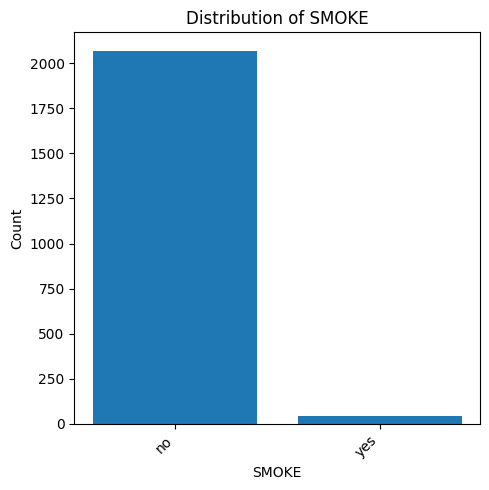

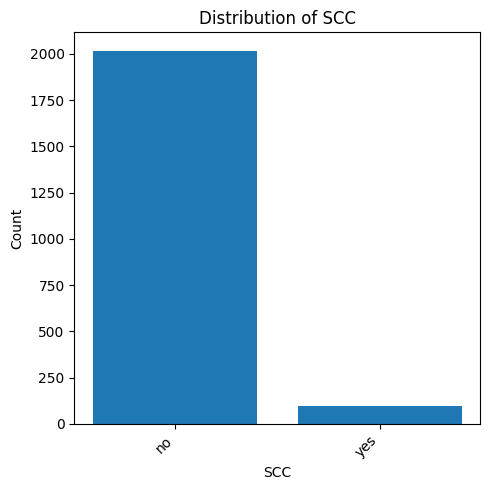

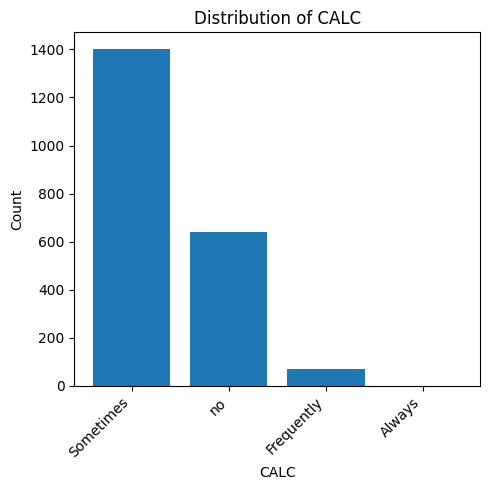

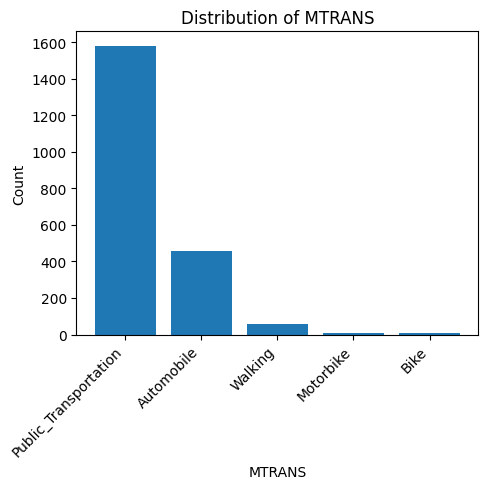

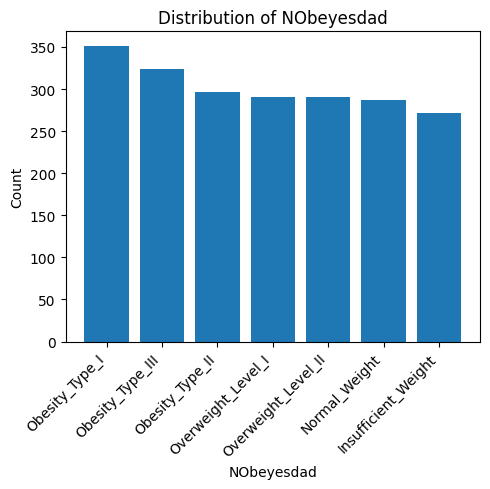

In [ ]:
cat_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

# Iterate through features and plot bar charts
for col in cat_features:
    # Count the occurrences of each category
    counts = dataset[col].value_counts().reset_index()
    counts.columns = [col, 'count']

    # Create a bar chart for the current feature
    plt.figure(figsize=(5, 5))  # Adjust figure size as needed
    plt.bar(counts[col], counts['count'])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

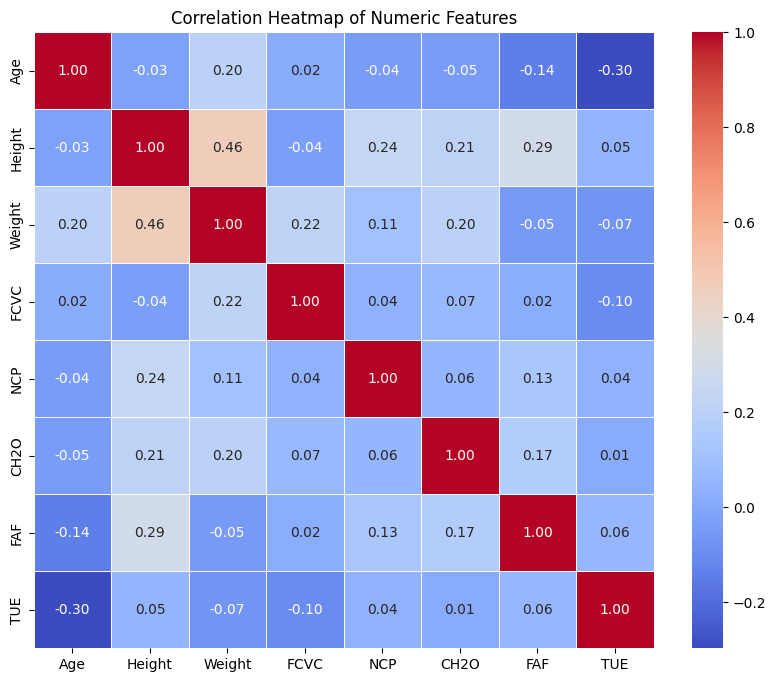

In [ ]:
# Selecting numeric features
numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Calculating correlation matrix
correlation_matrix = dataset[numeric_features].corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# **1.4	Data Pre-processing**

# Performing the Min-Max Scaling operation and append the normalized values of the numeric features in the dataset as new columns.
To achieve this task the MinMaxScaler libracy was imported and a for loop was used to iterated over all numeric feature to achieve a normalised dataset after this process the new generated column that have been normalised was titled there orignal name and '_scaled'was combined to differentiate them such as if the original column name was 'Age' after normalisation it was named 'Age_scaled'.

The first and last 10 rows was display.

In [ ]:
# numeric features
numeric_features =['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Min-Max Scaling for each numeric feature
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(dataset[numeric_features])
scaled_data = pd.DataFrame(scaled_values, columns=[f'{feat}_scaled' for feat in numeric_features])

# Append the normalized values as new columns in the dataset
dataset = pd.concat([dataset, scaled_data], axis=1)
print('First 10 rows of the normalised numeric features')
scaled_data.head(10)

First 10 rows of the normalised numeric features


,Age_scaled,Height_scaled,Weight_scaled,FCVC_scaled,NCP_scaled,CH2O_scaled,FAF_scaled,TUE_scaled
0,0.148936,0.320755,0.186567,0.5,0.666667,0.5,0.000000,0.5
1,0.148936,0.132075,0.126866,1.0,0.666667,1.0,1.000000,0.0
2,0.191489,0.660377,0.283582,0.5,0.666667,0.5,0.666667,0.5
3,0.276596,0.660377,0.358209,1.0,0.666667,0.5,0.666667,0.0
4,0.170213,0.622642,0.379104,0.5,0.000000,0.5,0.000000,0.0
5,0.319149,0.320755,0.104478,0.5,0.666667,0.5,0.000000,0.0
6,0.191489,0.094340,0.119403,1.0,0.666667,0.5,0.333333,0.0
7,0.170213,0.358491,0.104478,0.5,0.666667,0.5,1.000000,0.0
8,0.212766,0.622642,0.186567,1.0,0.666667,0.5,0.333333,0.5
9,0.170213,0.509434,0.216418,0.5,0.666667,0.5,0.333333,0.5


In [ ]:
# last 10 row of the scaled data
scaled_data.tail(10)

,Age_scaled,Height_scaled,Weight_scaled,FCVC_scaled,NCP_scaled,CH2O_scaled,FAF_scaled,TUE_scaled
2101,0.249404,0.336736,0.509097,1.0,0.666667,0.743535,0.022443,0.227911
2102,0.250333,0.335545,0.515727,1.0,0.666667,0.660034,0.015082,0.206553
2103,0.149295,0.517487,0.701743,1.0,0.666667,0.325306,0.512546,0.456228
2104,0.163455,0.532798,0.701820,1.0,0.666667,0.305384,0.503466,0.465728
2105,0.155021,0.522491,0.689073,1.0,0.666667,0.398134,0.576111,0.448962
2106,0.148443,0.491943,0.689616,1.0,0.666667,0.364070,0.558756,0.453124
2107,0.169850,0.563366,0.707037,1.0,0.666667,0.502565,0.447130,0.299635
2108,0.181362,0.570200,0.706637,1.0,0.666667,0.527097,0.471403,0.323144
2109,0.220467,0.546132,0.704079,1.0,0.666667,0.926170,0.379702,0.293017
2110,0.205632,0.544974,0.705020,1.0,0.666667,0.931757,0.342151,0.357069


# Label Encoding operation

To perform Label encoding operation I had to import the LabelEncorder libracy and also label encoding is a technique for converting category columns into numerical ones so that they may be fitted by machine learning models.
The converted columns where title there orignal feature name together with "_encoded". for an instant the gender feature was a categorical feature but after been converted the new feature was titled "Gender_encoded". Below are the first and last 10 rows of the newly titled features.

In [ ]:
# Identify categorical variables
categorical_vars =['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

# Label Encoding for each categorical variable
for var in categorical_vars:
    label_encoder = LabelEncoder()
    dataset[var + '_encoded'] = label_encoder.fit_transform(dataset[var])

# Insert the first-10 and last-10 rows of the new columns into the report
encoded_data_report = dataset[['Gender_encoded', 'family_history_with_overweight_encoded', 'FAVC_encoded', 'CAEC_encoded', 'SMOKE_encoded',
                               'SCC_encoded', 'CALC_encoded', 'MTRANS_encoded', 'NObeyesdad_encoded']]
encoded_data_report.head(10)


,Gender_encoded,family_history_with_overweight_encoded,FAVC_encoded,CAEC_encoded,SMOKE_encoded,SCC_encoded,CALC_encoded,MTRANS_encoded,NObeyesdad_encoded
0,0,1,0,2,0,0,3,3,1
1,0,1,0,2,1,1,2,3,1
2,1,1,0,2,0,0,1,3,1
3,1,0,0,2,0,0,1,4,5
4,1,0,0,2,0,0,2,3,6
5,1,0,1,2,0,0,2,0,1
6,0,1,1,2,0,0,2,2,1
7,1,0,0,2,0,0,2,3,1
8,1,1,1,2,0,0,1,3,1
9,1,1,1,2,0,0,3,3,1


In [ ]:
#last 10 rows of the new features
encoded_data_report.tail(10)

,Gender_encoded,family_history_with_overweight_encoded,FAVC_encoded,CAEC_encoded,SMOKE_encoded,SCC_encoded,CALC_encoded,MTRANS_encoded,NObeyesdad_encoded
2101,0,1,1,2,0,0,2,3,4
2102,0,1,1,2,0,0,2,3,4
2103,0,1,1,2,0,0,2,3,4
2104,0,1,1,2,0,0,2,3,4
2105,0,1,1,2,0,0,2,3,4
2106,0,1,1,2,0,0,2,3,4
2107,0,1,1,2,0,0,2,3,4
2108,0,1,1,2,0,0,2,3,4
2109,0,1,1,2,0,0,2,3,4
2110,0,1,1,2,0,0,2,3,4


# Data Visualization

Bar Chart of Obesity Categories:
This visualization shows the distribution of individuals across different obesity categories.

Histogram of Physical Activity Frequency (FAF):
This histogram displays the distribution of physical activity frequency among individuals.

Count Plot of Gender:
This visualization shows the distribution of individuals by gender.

Violin Plot of Calories Consumption Monitoring (SCC) by Obesity Category:
This visualization shows the distribution of calories consumption monitoring across different obesity categories.

Heatmap for correlation:
This visualization shows the correlation between each feature.

# **2	Modelling/ Classification**

The classification task was performed to achieve the following task:
1.   Predicting Obesity status  

In [ ]:
dataset.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'Age_scaled', 'Height_scaled',
       'Weight_scaled', 'FCVC_scaled', 'NCP_scaled', 'CH2O_scaled',
       'FAF_scaled', 'TUE_scaled', 'Gender_encoded',
       'family_history_with_overweight_encoded', 'FAVC_encoded',
       'CAEC_encoded', 'SMOKE_encoded', 'SCC_encoded', 'CALC_encoded',
       'MTRANS_encoded', 'NObeyesdad_encoded'],
      dtype='object')

In [ ]:
# prediction of obesity status
# Select categorical features and target variable
X = dataset[['Gender_encoded', 'family_history_with_overweight_encoded', 'FAVC_encoded', 'CAEC_encoded', 'MTRANS_encoded']]
y1 = dataset['NObeyesdad']

# Split data into train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.3, random_state=42)

# Task 1: Predicting Obesity Status
# Train the classifier
classifier1 = RandomForestClassifier(random_state=42)
classifier1.fit(X_train1, y_train1)

# Make predictions
y_pred1 = classifier1.predict(X_test1)

# Evaluate the model
print("Classification Report for Predicting Obesity Status:")
print(classification_report(y_test1, y_pred1))

Classification Report for Predicting Obesity Status:
                     precision    recall  f1-score   support

Insufficient_Weight       0.60      0.59      0.60        86
      Normal_Weight       0.59      0.45      0.51        93
     Obesity_Type_I       0.34      0.10      0.15       102
    Obesity_Type_II       0.38      0.98      0.54        88
   Obesity_Type_III       0.63      0.99      0.77        98
 Overweight_Level_I       0.60      0.20      0.31        88
Overweight_Level_II       0.61      0.28      0.38        79

           accuracy                           0.51       634
          macro avg       0.54      0.51      0.47       634
       weighted avg       0.53      0.51      0.46       634



# **RESULT**

The model predicted obese status in 51% of test cases, although this score is insufficient given the dataset's imbalance. Precision, which assesses positive predictions, was high for Obesity_Type_III (63%) and Overweight_Level_II (61%), but low for Obesity_Type_I (34%). Recall, which measures the model's ability to recognise true positives, was outstanding for Obesity_Type_II (98%) and III (99%), but severely bad for Type_I (10%), suggesting the model struggles with specific classifications. The model performed best in Obesity_Type_III (77%) but poorly in Obesity_Type_I (15%) and Overweight_Level_I (31%), indicating its difficulty in several categories.


# **3	Solution Improvement**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X = dataset[['Gender_encoded', 'family_history_with_overweight_encoded', 'FAVC_encoded', 'CAEC_encoded', 'MTRANS_encoded']]  # Use encoded features
y1 = dataset['NObeyesdad']

# Split data into train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.3, random_state=42)

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='f1_weighted',  # Adjust based on your goal (e.g., accuracy, recall, etc.)
    verbose=2,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model to the training data
grid_search.fit(X_train1, y_train1)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Weighted Score:", grid_search.best_score_)

# Use the best model to make predictions
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test1)

# Evaluate the performance
print("\nClassification Report:")
print(classification_report(y_test1, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best F1-Weighted Score: 0.46015318380100767

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.61      0.59      0.60        86
      Normal_Weight       0.58      0.48      0.53        93
     Obesity_Type_I       0.32      0.10      0.15       102
    Obesity_Type_II       0.38      0.98      0.54        88
   Obesity_Type_III       0.63      0.99      0.77        98
 Overweight_Level_I       0.62      0.20      0.31        88
Overweight_Level_II       0.68      0.27      0.38        79

           accuracy                           0.52       634
          macro avg       0.55      0.52      0.47       634
       weighted avg       0.54      0.52      0.47       634



# Significance of the Analysis

Obesity is a major public health issue, causing a slew of chronic diseases and imposing significant economic costs on healthcare systems throughout the world.The data and model will be used to identify important obesity risk factors and guide evidence-based interventions aimed at encouraging healthier lifestyles and lowering the prevalence of obesity-related disorders. Obesity data is critical for healthcare professionals, wellness programs, insurance companies, and public health efforts. Predictive models can help healthcare practitioners identify people who are at risk of becoming obese, allowing for early intervention and illness prevention. Wellness programs and insurance firms may customize interventions and evaluate health risks, whereas fitness facilities can design exercise regimens to specific risk profiles. Public health efforts can use findings to help shape policies and actions targeted at lowering obesity prevalence and encouraging healthier lifestyles.



In [ ]:
!jupyter nbconvert --execute --to html

[NbConvertApp] WARNING | pattern 'obesity.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Exe